In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import copy
import time
from scipy.ndimage import convolve

ModuleNotFoundError: No module named 'moviepy'

In [4]:
N = 20
A = np.zeros([N, N])
Adj = np.zeros([N * N, N * N])

In [10]:
dx = np.array([- 1, 0, 1, - 1, 1, - 1, 0, 1])
dy = np.array([- 1, - 1, - 1, 0, 0, 1, 1, 1])
for x in range(N):
    for y in range(N):
        index = N*x + y
        for ne in range(np.size(dx)):
            newx = x + dx[ne]
            newy = y + dy[ne]
            if (newx >= 0 and newx < N and newy >= 0 and newy < N):
                index2 = N*newx + newy
                Adj[index, index2] = 1

In [94]:
Adj

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [25]:
Deg = np.diag(np.sum(Adj, 1))
L = Deg - Adj
[D1, P] = np.linalg.eigh(L)
D = np.diag(D1)

In [50]:
np.linalg.det(np.matmul(np.transpose(P),P))

1.0000000000000373

In [32]:
P.shape

(400, 400)

In [57]:
C0 = np.zeros([N, N])
C0[2:5, 2:5] = 5
C0[10:15, 10:15] = 10
C0[2:5, 8:13] = 7
C0 = C0.flatten()
C0V = np.matmul(np.transpose(P), C0)

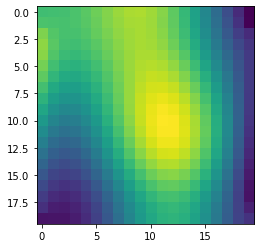

In [93]:
frames = []
fig = plt.figure()
for t in np.arange(0, 5, 0.05):
    Phi = C0V * np.exp(-D1 * t)
    Phi = np.matmul(P, Phi)
    Phi = np.reshape(Phi, [N, N]);
    frames.append([plt.imshow(Phi, animated = True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True, repeat_delay=1000)
ani.save("diffusion.gif")
plt.show()

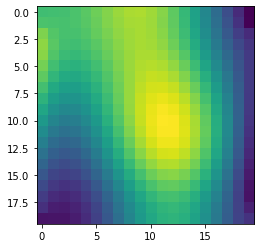

In [83]:
plt.imshow(Phi)

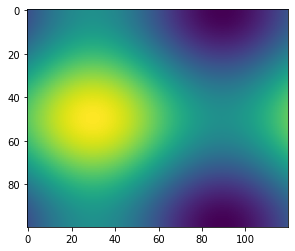

In [92]:
fig, ax = plt.subplots()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = ax.imshow(f(x, y), animated=True)
    if i == 0:
        ax.imshow(f(x, y))  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
ani.save("movie.gif")